<a href="https://colab.research.google.com/github/vinodkumar-s/mnist-classification/blob/main/exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: VINOD KUMAR S
# Register No: 212222240116

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[16]

In [ ]:
single_image.shape

(28, 28)

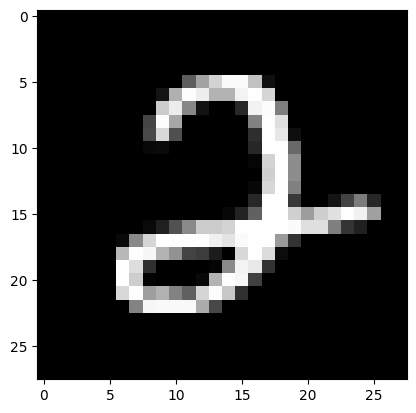

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

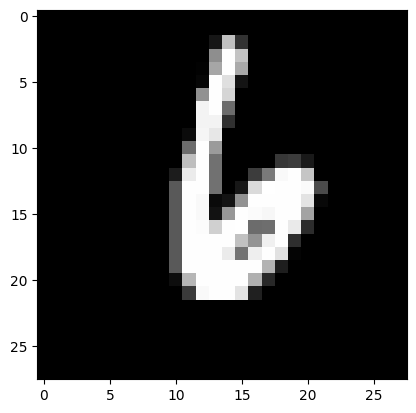

In [ ]:
single_image = X_train[204]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16, kernel_size=(9,9), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(65,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 16)        1312      
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 16)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 65)                37505     
                                                                 
 dense_1 (Dense)             (None, 10)                660       
                                                                 
Total params: 39477 (154.21 KB)
Trainable params: 39477 (154.21 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 28s 28ms/step - loss: 0.2646 - accuracy: 0.9249 - val_loss: 0.0867 - val_accuracy: 0.9737
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0794 - accuracy: 0.9757 - val_loss: 0.0576 - val_accuracy: 0.9820
Epoch 3/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0438 - val_accuracy: 0.9849
Epoch 4/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0458 - val_accuracy: 0.9843
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0344 - val_accuracy: 0.9878


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.264617,0.924883,0.086651,0.9737
1,0.079395,0.975733,0.057550,0.9820
2,0.056818,0.982783,0.043780,0.9849
3,0.045693,0.985817,0.045840,0.9843
4,0.039480,0.987567,0.034443,0.9878


212222240116 VINOD KUMAR S


<Axes: >

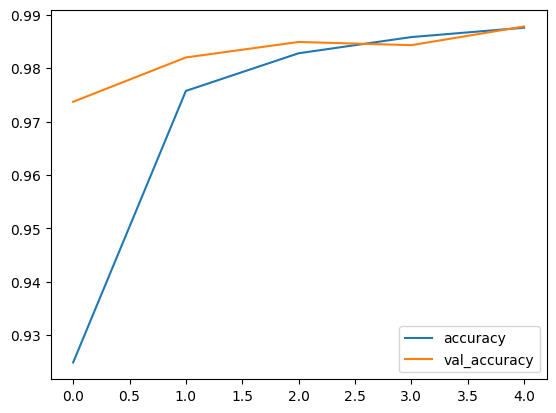

In [ ]:
print("212222240116 VINOD KUMAR S")
metrics[['accuracy','val_accuracy']].plot()

212222240116 VINOD KUMAR S


<Axes: >

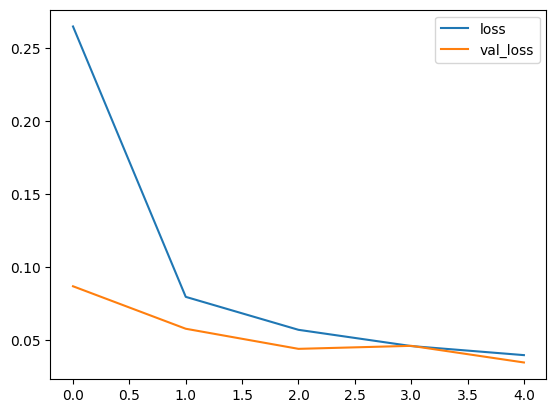

In [ ]:
print("212222240116 VINOD KUMAR S")
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 8ms/step


In [ ]:
print("212222240116 VINOD KUMAR S")
print("\n")
print(confusion_matrix(y_test,x_test_predictions))

212222240116 VINOD KUMAR S


[[ 975    0    1    0    0    1    0    2    1    0]
 [   0 1129    2    1    0    0    1    1    1    0]
 [   3    1 1022    0    2    0    0    2    2    0]
 [   0    0    0 1004    0    3    0    2    0    1]
 [   0    0    0    0  976    0    1    0    2    3]
 [   2    0    0    4    0  881    2    1    1    1]
 [   6    3    0    0    2    6  940    0    1    0]
 [   0    3    8    4    1    0    0 1007    2    3]
 [   4    0    1    2    1    0    1    3  959    3]
 [   4    2    2    0    5    2    0    6    3  985]]


In [ ]:
print("212222240116 VINOD KUMAR S")
print("\n")
print(classification_report(y_test,x_test_predictions))

212222240116 VINOD KUMAR S


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('6.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('6.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(x_single_prediction)

[6]


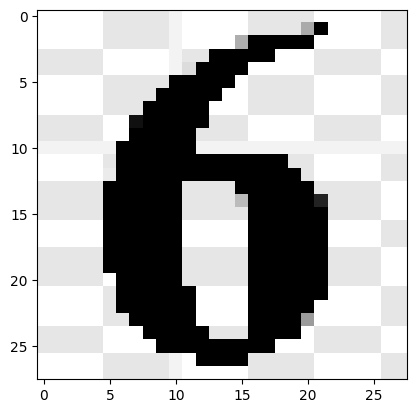

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(x_single_prediction)

[6]
